In [2]:
# import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [3]:
# get .csv data

data = pd.read_csv('data\zoo3.csv')

<>:3: SyntaxWarning: invalid escape sequence '\z'
<>:3: SyntaxWarning: invalid escape sequence '\z'
C:\Users\Lucas Tiepo\AppData\Local\Temp\ipykernel_8176\398892810.py:3: SyntaxWarning: invalid escape sequence '\z'
  data = pd.read_csv('data\zoo3.csv')


In [10]:
# config 
numEpocas = 500            # Número de épocas.
q = 70                      # Número de padrões.
taxaDeAprendizado = 0.01    # Taxa de aprendizado
neuroniosEntrada = 16       # Número de neurônios na camada de entrada
neuroniosCamada2 = 32       # Número de neurônios na primeira camada escondida
neuroniosCamada3 = 16       # Número de neurônios na segunda camada escondida
neuroniosCamada4 = 8        # Número de neurônios na segunda camada escondida
NeuroniosSaida = 1          # Número de neurônios na camada de saída (1-Mamífero, 2-Ave, 3-Réptil, 4-Peixe, 5-anfíbeio, 6-inseto, 7-crustáceo)

# Carrega os dados de treinamento
pelo = np.array(data['hair'])
penas = np.array(data['feathers'])
ovos = np.array(data['eggs'])
leite = np.array(data['milk'])
ossosLeves = np.array(data['airborne'])
aquatico = np.array(data['aquatic'])
predador = np.array(data['predator'])
dentes = np.array(data['toothed'])
colunaVertebral = np.array(data['backbone'])
respira = np.array(data['breathes'])
venenoso = np.array(data['venomous'])
barbatanas = np.array(data['fins'])
pernas = np.array(data['legs'])
rabo = np.array(data['tail'])
domestico = np.array(data['domestic'])
catsize = np.array(data['catsize'])

# Classificação
#d = np.array(data['class_type'], dtype=float)
d = -1 + (np.array(data['class_type'], dtype=float) - 1) / 3
print(d)


[-1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -0.66666667 -0.66666667 -0.66666667 -0.66666667 -0.66666667
 -0.66666667 -0.66666667 -0.66666667 -0.66666667 -0.66666667 -0.66666667
 -0.66666667 -0.66666667 -0.66666667 -0.66666667 -0.66666667 -0.66666667
 -0.66666667 -0.66666667 -0.66666667 -0.33333333 -0.33333333 -0.33333333
 -0.33333333 -0.33333333 -0.33333333 -0.33333333 -0.33333333  0.
  0.          0.          0.          0.          0.          0.
  0.          0.33333333  0.33333333  0.33333333  0.33333333  0.33333333
  0.33333333  0.66666667  0.66666667  0.66666667  0.66666667  0.66666667
  1.          1.          1.          1.        ]


In [11]:
# Inicia aleatoriamente as matrizes de pesos.
# Inicializando com m, N e L nos dá a liberdade de diferentes arquiteturas (só alterando as linhas 17,18 e 19)
# Inicia aleatoriamente as matrizes de pesos.
W1 = np.random.random((neuroniosCamada2, neuroniosEntrada + 1)) #dimensões da Matriz de entrada
W2 = np.random.random((neuroniosCamada3, neuroniosCamada2 + 1)) #dimensões da Matriz de saída
W3 = np.random.random((neuroniosCamada4, neuroniosCamada3 + 1)) #dimensões da Matriz de saída
W4 = np.random.random((NeuroniosSaida, neuroniosCamada4 + 1))   #dimensões da Matriz de saída

# Array para amazernar os erros.
E = np.zeros(q)
Etm = np.zeros(numEpocas) #Etm = Erro total médio ==> serve para acompanharmos a evolução do treinamento da rede

# bias
bias = 1

# Entrada do Perceptron.
X = np.vstack((pelo, penas, ovos, 
               leite, ossosLeves, aquatico, 
               predador, dentes, colunaVertebral, 
               respira, venenoso, barbatanas, pernas, 
               rabo, domestico, catsize))  

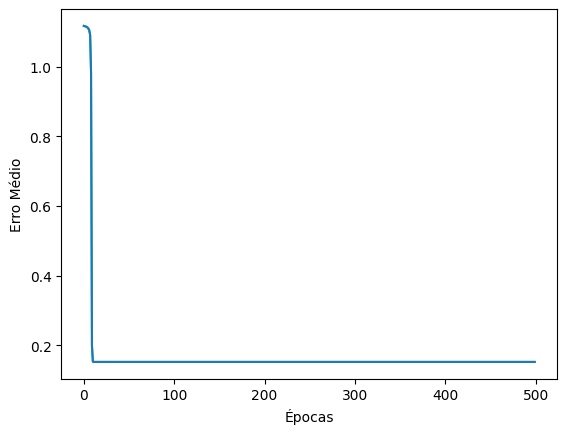

In [12]:
# ===============================================================
# TREINAMENTO.
# ===============================================================

for i in range(numEpocas):
    for j in range(q):
        # Insere o bias no vetor de entrada
        Xb = np.hstack((bias, X[:, j]))

        # Saída da primeira camada escondida
        o1 = np.tanh(W1.dot(Xb))
        o1b = np.insert(o1, 0, bias)

        # Saída da segunda camada escondida
        o2 = np.tanh(W2.dot(o1b))
        o2b = np.insert(o2, 0, bias)

        # Saída da terceira camada escondida
        o3 = np.tanh(W3.dot(o2b))
        o3b = np.insert(o3, 0, bias)

        # Saída da camada de saída
        Y = np.tanh(W4.dot(o3b))

        # Erro
        e = d[j] - Y

        # Erro Total
        E[j] = (e.transpose().dot(e)) / 2

        # Retropropagação do erro
        delta4 = np.diag(e).dot((1 - Y * Y))
        vdelta4 = (W4.transpose()).dot(delta4)

        delta3 = np.diag(1 - o3b * o3b).dot(vdelta4)
        vdelta3 = (W3.transpose()).dot(delta3[1:])

        delta2 = np.diag(1 - o2b[1:] * o2b[1:]).dot(vdelta3[1:])   
        vdelta2 = (W2.transpose()).dot(delta2)
        
        delta1 = np.diag(1 - o1b[1:] * o1b[1:]).dot(vdelta2[1:])

        # Atualização dos pesos
        W1 = W1 + taxaDeAprendizado * (np.outer(delta1, Xb))
        W2 = W2 + taxaDeAprendizado * (np.outer(delta2, o1b))
        W3 = W3 + taxaDeAprendizado * (np.outer(delta3[1:], o2b))
        W4 = W4 + taxaDeAprendizado * (np.outer(delta4, o3b))

    # Calculo da média dos erros
    Etm[i] = E.mean()

plt.xlabel("Épocas")
plt.ylabel("Erro Médio")
plt.plot(Etm, color='c')
plt.plot(Etm)
plt.show()

In [24]:
# ===============================================================
# TESTE DA REDE.
# ===============================================================

Error_Test = np.zeros(q)

for i in range(q):
    # Insere o bias no vetor de entrada.
    Xb = np.hstack((bias, X[:,i]))

    # Saída da primeira camada escondida
    o1 = np.tanh(W1.dot(Xb))
    o1b = np.insert(o1, 0, bias)

    # Saída da segunda camada escondida
    o2 = np.tanh(W2.dot(o1b))
    o2b = np.insert(o2, 0, bias)

    # Saída da terceira camada escondida
    o3 = np.tanh(W3.dot(o2b))
    o3b = np.insert(o3, 0, bias)

    # Saída da camada de saída
    Y = np.tanh(W4.dot(o3b))


    Error_Test[i] = d[i] - (Y)

print(np.abs(np.round((Error_Test) - d))) #aqui se ela acertou todas o vetor tem que estar zerado


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


C:\Users\Lucas Tiepo\AppData\Local\Temp\ipykernel_8176\1223076266.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Error_Test[i] = d[i] - (Y)
